In [1]:
# to read old Matlab format
#from scipy.io import loadmat    
#feature_onse_3s = loadmat('data/feature_onset_3s.mat')

In [2]:
# v73 format is loaded by h5py
import h5py
import numpy as np

featureFilename = "data/feature_onset_3s.mat"
with h5py.File(featureFilename,'r') as hf:
    feature_cor = np.array(hf.get('old_cor_data_onset_3s'))
    print('Shape of the array feature_new_data = \n', feature_cor.shape)

    feature_incor = np.array(hf.get('old_incor_data_onset_3s'))
    print('Shape of the array feature_old_data = \n', feature_incor.shape)


Shape of the array feature_new_data = 
 (86, 1672)
Shape of the array feature_old_data = 
 (23, 1672)


Text(0,0.5,'count')

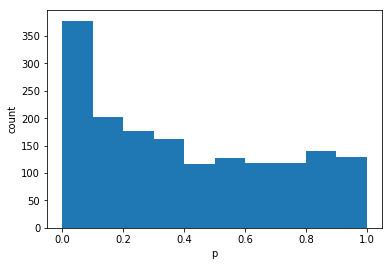

In [3]:
# Calculate the Wilcoxon rank sum test.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html

from scipy.stats import ranksums

numTrialCor, dimFeature = feature_cor.shape
numTrialIncor, dimFeature = feature_incor.shape

# for each channel*freq
pVal = list()
for i in range(dimFeature):
    T, p = ranksums(feature_cor[:,i], feature_incor[:,i])
    pVal.append(p)
    

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(pVal)
plt.xlabel('p')
plt.ylabel('count')

Text(0.5,0,'channel')

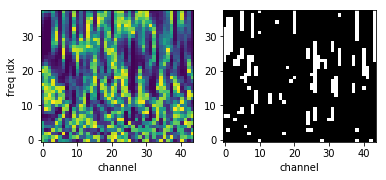

In [4]:
pVal2D = np.reshape(pVal, (38, 44))
idxSelectedFeature = pVal2D<0.05

plt.subplot(121)
plt.imshow(pVal2D)
plt.gca().invert_yaxis()
plt.xlabel('channel')
plt.ylabel('freq idx')
plt.subplot(122)
plt.imshow(idxSelectedFeature, cmap='gray')
plt.gca().invert_yaxis()
plt.xlabel('channel')

In [5]:
# print selected channels
Fs = [ 1,     2,     3,     4,     5,     6,     7,     8,     9,    10,    11,    12,    13,    15,
    17,    19,    21,    23,    25,    27,    29,    32,    36,    40,    44,    48,    52,    56,
    64,    68,    72,    76,    80,    84,    88,    92,    96,   100]

#pTh = 0.05
#pTh = 0.1 # increase a bit 
pTh = 0.15 # increase more

#plt.imshow(range(42),Fs, pVal2D)
listSelectedFeature = list()
for ch in range(44):
    for i in range(38):
        if pVal2D[i][ch] < pTh: #idxSelectedFeature[i,ch]:
            print("ch={}, freq={}".format(ch+1,Fs[i]))
            listSelectedFeature.append((ch+1,i))
np.savetxt("listSelectedFeature_p{}.txt".format(pTh), listSelectedFeature)
print(listSelectedFeature)
print(len(listSelectedFeature))

ch=1, freq=7
ch=1, freq=8
ch=1, freq=9
ch=1, freq=10
ch=1, freq=11
ch=1, freq=40
ch=1, freq=44
ch=1, freq=48
ch=1, freq=52
ch=1, freq=56
ch=1, freq=64
ch=1, freq=68
ch=1, freq=72
ch=1, freq=76
ch=1, freq=80
ch=1, freq=84
ch=1, freq=88
ch=2, freq=4
ch=2, freq=7
ch=2, freq=8
ch=2, freq=44
ch=2, freq=48
ch=2, freq=52
ch=2, freq=56
ch=2, freq=64
ch=2, freq=68
ch=2, freq=72
ch=2, freq=76
ch=2, freq=80
ch=2, freq=84
ch=2, freq=88
ch=2, freq=92
ch=2, freq=96
ch=3, freq=4
ch=3, freq=7
ch=3, freq=8
ch=3, freq=36
ch=3, freq=40
ch=3, freq=44
ch=3, freq=48
ch=3, freq=52
ch=3, freq=56
ch=3, freq=64
ch=3, freq=68
ch=3, freq=72
ch=3, freq=76
ch=3, freq=80
ch=3, freq=84
ch=3, freq=88
ch=3, freq=92
ch=3, freq=96
ch=4, freq=7
ch=4, freq=8
ch=4, freq=32
ch=4, freq=36
ch=4, freq=40
ch=4, freq=44
ch=5, freq=1
ch=5, freq=8
ch=5, freq=9
ch=5, freq=10
ch=5, freq=29
ch=5, freq=32
ch=5, freq=36
ch=5, freq=40
ch=5, freq=44
ch=5, freq=48
ch=6, freq=3
ch=6, freq=9
ch=6, freq=10
ch=6, freq=23
ch=6, freq=25
ch=6, fr

In [6]:
# Now, select features 
idx=np.array(pVal)<pTh
selected_feature_cor = feature_cor[:,idx]
selected_feature_incor = feature_incor[:,idx]

In [7]:
print(selected_feature_cor.shape)
print(selected_feature_incor.shape)

(86, 483)
(23, 483)


In [8]:
# let's standardize data
X = np.concatenate((selected_feature_cor, selected_feature_incor),axis=0)
Y = np.append(np.ones(numTrialCor),-np.ones(numTrialIncor))

from sklearn import preprocessing
# http://scikit-learn.org/stable/modules/preprocessing.html
X_scaled = preprocessing.scale(X)

print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[-9.71699785e-16 -2.51073372e-15 -1.01314217e-15  2.17461115e-16
  1.57060909e-15  1.55431223e-15  3.29552899e-15  1.23244941e-15
  5.68352704e-16 -1.39949214e-15  2.83208727e-15 -2.64823841e-17
 -4.07421293e-17  2.32484776e-15  2.10433098e-15 -1.29254405e-15
 -3.54456525e-16 -2.39869287e-16 -8.06153055e-16  1.35976857e-15
  5.62241385e-16 -4.36577380e-15 -1.75420331e-15 -3.69021837e-15
 -2.64416419e-15  3.23899928e-16  3.29400116e-15  1.23499580e-15
  1.23957929e-15 -5.69371258e-16  1.79163514e-15  2.38952589e-15
 -1.83747003e-15 -3.94224663e-15  1.90163889e-15  1.89450901e-15
  5.77010407e-16 -1.64292637e-15 -9.11605144e-16 -1.21462473e-15
 -7.55766499e-16  8.39797141e-16 -1.57875751e-16  1.75394867e-15
 -3.37039265e-15 -4.80757126e-16  6.21317472e-16  2.47992249e-15
  2.91102514e-15  9.47254507e-17 -1.87413795e-15 -1.72797556e-15
  3.39381937e-15 -1.30884091e-16 -1.95562221e-16  8.69844461e-16
 -2.34267244e-15 -5.58167172e-16 -3.15751502e-15  9.53684125e-16
  1.31291512e-15 -2.63652

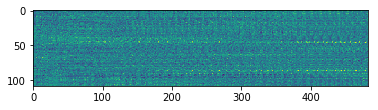

In [9]:
plt.imshow(X_scaled)

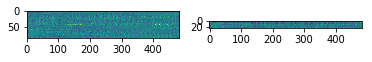

In [10]:
# compare mean
plt.subplot(121)
plt.imshow(X_scaled[Y>0,:])
plt.subplot(122)
plt.imshow(X_scaled[Y<0,:])

In [11]:
# save to a file
np.savetxt("WT_3s_X_p{}.txt".format(pTh),X)   # 44x45
np.savetxt("WT_3s_X_scaled_p{}.txt".format(pTh),X_scaled)   # 44x45
np.savetxt("WT_3s_Y_p{}.txt".format(pTh), Y)         # 44x1

# copy these files to data/